    EDA для датасета Титаник
    https://www.kaggle.com/c/titanic/data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
# read data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


NameError: name 'pd' is not defined

In [3]:
# посмотрим на данные. На признаки (фичи) некие сущности, которые описывает объекты в данных
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# непрерывные признаки это те, которые могут принимать любое значение из некоторого диапазона.Например, вес, рост, возраст, цвет, дата, время, дата и время.
# категориальные признаки это те, которые принимают значение из некоторого ограниченного набора. Например, пол, страна, город, бренд, цвет, день недели, месяц, год.

In [5]:
# drop all categorical features
cat_features = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']# categorical featuresthat will be dropped
train_df.drop(cat_features, axis=1, inplace=True) # axis=1 means drop columns, inplace=True means drop columns inplace
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


    что видно.. то что выжило 38 процентов. В survived mean 38
    Pclass это скорее всего класс пассажиров(типа 1,2,3)

    нужно искать признаки, которые более сильно влияют, на то выжил человек или нет

In [6]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# видно что fare(стоимость билета) у тех кто выжил в среднем выше почти в 2 раза
# Pclass у тех кто не выжил, в среднем ближе к третьему классу

train_df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [8]:
# сгруппирую возраста относительно того отсутствуют ли они либо нет
# 0.293785 - средний возраст у тех у кого возраст не указан, имели шансы выжить 29%, менее чем у тех у кого возраст указан
# и у них так же был более низкий класс(судя по цене билета Fare)
train_df.groupby(train_df['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


# plot continuous features

/tmp/ipykernel_31512/3204087091.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
/tmp/ipykernel_31512/3204087091.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, widt

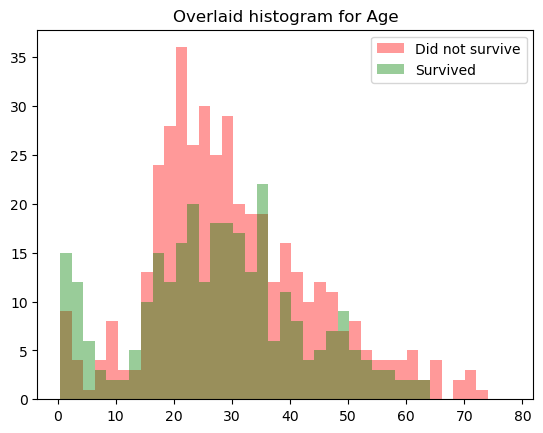

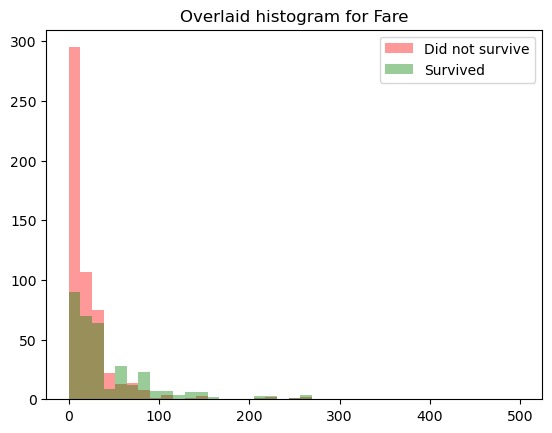

In [9]:
"""
пытаемся понять какие признаки важны для выживания
- возраст
- стоимость билета
на вскидку возрастная группа от 0 до 10 имеет больше выживших, чем умерших
основная масса не выживших в возрасте от 18 до 30 лет

и по цене видно, что высокий показатель не выживших у тех у кого билет дешевле до 25 долларов
"""

for i in ['Age', 'Fare']:
    died = list(train_df[train_df['Survived'] == 0][i].dropna())
    survived = list(train_df[train_df['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 640x480 with 0 Axes>

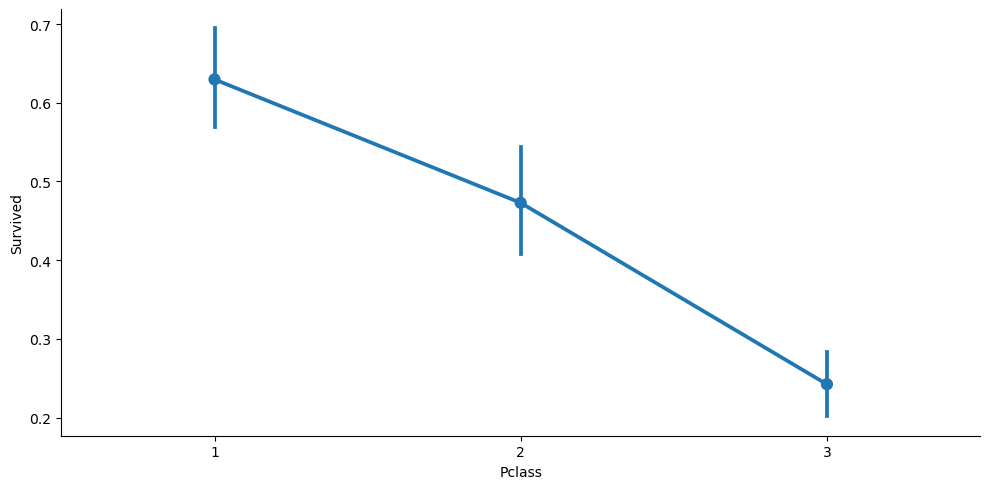

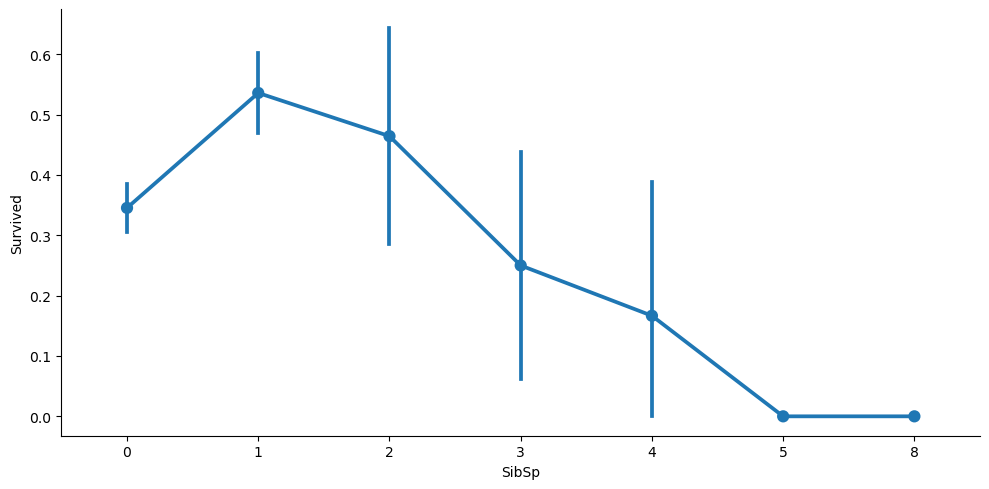

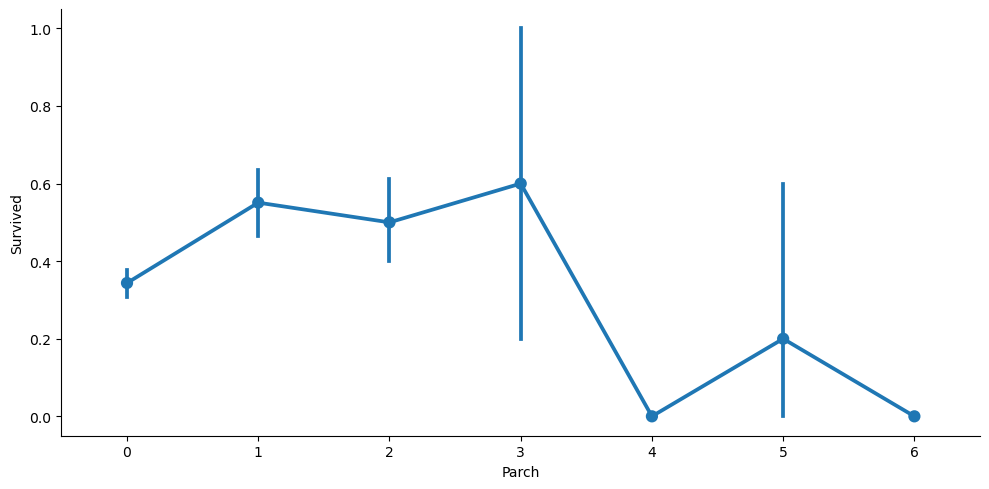

In [10]:
""" 
первый график показывает что выжило гораздо больге из первого класса

второй график взаимосвязь между количеством родственников и выживаемостью
у кого было больше родственников, те имели меньше шансов выжить

третий график взаимосвязь между количеством детей и выживаемостью
"""
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i) # создаем новую фигуру
    # x - признак, y - выжившие, data - данные, kind - тип графика, aspect - соотношение сторон графика
    sns.catplot(x=col, y='Survived', data=train_df, kind='point', aspect=2, ) #

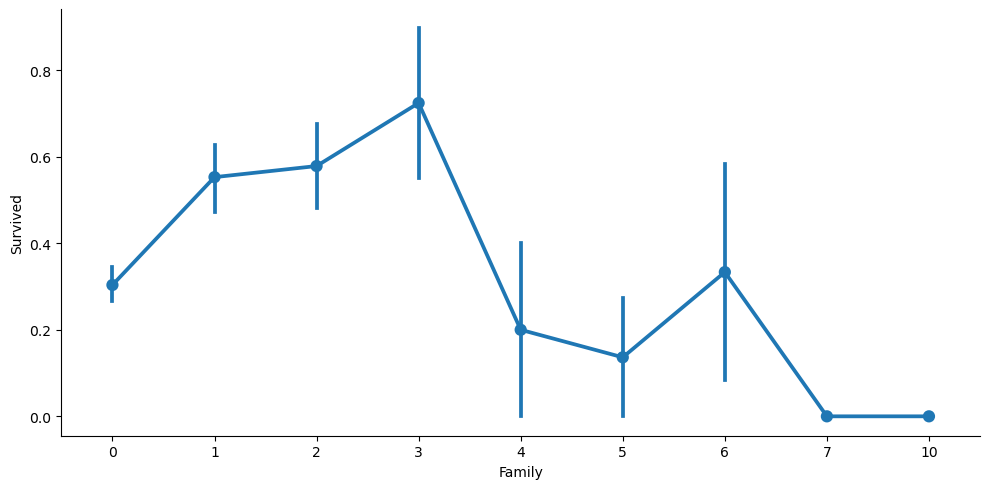

In [11]:
# так как 'SibSp', 'Parch' имееют отношение к семье, то можно объединить их в один признак
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
sns.catplot(x='Family', y='Survived', data=train_df, kind='point', aspect=2)

In [12]:
train_df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Family        0
dtype: int64

In [13]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())# заменяем NA на среднее значение
train_df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Family      0
dtype: int64

In [14]:
train_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,1
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,1
4,0,3,35.000000,0,0,8.0500,0
5,0,3,29.699118,0,0,8.4583,0
6,0,1,54.000000,0,0,51.8625,0
7,0,3,2.000000,3,1,21.0750,4
8,1,3,27.000000,0,2,11.1333,2
9,1,2,14.000000,1,0,30.0708,1


In [15]:
# что бы избежать мультиколинеарности. Удалим 'SibSp', 'Parch'. мультиколинеарность это когда один признак линейно зависит от другого
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [16]:
train_df.head()

,Survived,Pclass,Age,Fare,Family
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0
